Self-organizing maps (SOMs) are a data visualization technique invented by Professor Teuvo Kohonen which reduce the dimensions of data through the use of self-organizing neural networks. The problem that data visualization attempts to solve  is that humans simply cannot visualize high dimensional data as is so techniques are created to help us understand this high dimensional data. Two other techniques of reducing the dimensions of data that has been presented in this course has been N-Land and Multi-dimensional Scaling. The way  SOMs go about reducing dimensions is by producing a map of usually 1 or 2 dimensions which plot the similarities of the data by grouping similar data items together.  So SOMs accomplish two things, they reduce dimensions and display similarities.

### <center>Kohonen map.</center>

 - **Inizialization**
 
     The most popular ways to set the initial node weights are:

     - Set the random values to all weights.
     - To take random $x_i$ from the input data and set it into weights.
     - The choice of weight vectors from  from main components [(PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) of the input data set.
  
  As a result, we get $M_k$ is the map of neurons. $k$- neurons, their count is sets by the an analytics.
  
      $N$ - number of input data.
    
 - **Trainning**
 
    Initializing $t=0$ is it number of iteration and shuffling input data.
    
     - Choosing $x(t)$ from input data. 
     - Calculate distance  $$d_i(x(t), m_i(t)) = \sqrt{(x_1(t) - m_{1i}(t))^2 + (x_2(t) - m_{2i}(t))^2 + ... + (x_n(t) - m_{ni}(t))^2}$$ from the input vector to all neurons of the map. Here:
          - $d_i(x(t), m_i(t))$ is [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).
          - $x(t)$ is input vector.
          - $m_i \in M_k$ 
     
     Аmong all the neurons, it is determined closest to the incoming vector $d_{min} = argmin\{d_i\}$.The neuron associated to the $d_{min}$ will be the winner. If $d_{min}$ is reached at several neurons the winner will chosen randomly. $m_w$ is  winner neuron.
     
    Kohonen maps, unlike networks, use the "Winner Takes Most" algorithm in training. In this way the weights of not only the neuron of the winner, but also of [topologically](https://en.wikipedia.org/wiki/Topology) close neurons are updated.
   
     - Calculate $h$ function that defines the "measure of neighborhood" for neurons. Typically $h$ is the [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function). $$h_{wi} = \alpha(t)  \exp(-\frac{||m_w - m_i||^2}{2 \gamma(t) ^ 2})  $$ 
          - $m_w$ is winner neuron.
          - $m_i \in M_k$ is neuron from map.
          - $\gamma(t)$ is the value function the number of neighbors. The most commonly used function is linearly decreasing from the training itaration number. The value on the first iteration sets by the analyst. Also in simple version $\gamma(t) = \alpha(t)$.
          - $\alpha(t)$ is learning rate function. In simple version is constant. But for the best result, the function is often used $$\alpha(t) = \frac{A}{t + B}$$ here 
              - $t$ is number of iteration.
              - $A and B$ is constant.
          
  - Change weights.
      
      Calculate $m_i(t) = m_i(t-1) + h_i(t) (x(t) - m_i(t-1)),     i = 1,2,..., k$.
      
      
  Update the weights of all neurons that are neighbors of the winner's neuron.
  Increase $t$ and repeat learning.

  Training continues until $t < N$  or until the error becomes small.

Self-organizing maps uses in [data mining](https://en.wikipedia.org/wiki/Data_mining) like a text analysis, financial statement analysis or image analysis.

The advantages of self-organizing cards:
    - Dimensionality reduction.
    - Topological modeling of the training set.
    - Resistance to outliers and missed data.
    - Simple visualization

Visualization of the work of the self-organizing card.
<img src="https://annalyzin.files.wordpress.com/2017/11/som-iterateanimate.gif?w=620" alt="Self orginizing map">

In [12]:
!pip3 install git+https://github.com/compmonks/SOMPY.git

  Cloning https://github.com/compmonks/SOMPY.git to /private/var/folders/j2/7y42d27x6h37938m5tbhbzkm0000gn/T/pip-req-build-5ifd49bz
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
!pip3 install ipdb

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from time import time
import sompy
np.random.seed(17)

ImportError: cannot import name 'SOM' from 'sompy' (/Users/aniruddhachoudhury/anaconda3/envs/nw/lib/python3.7/site-packages/sompy/__init__.py)

# PART 2

In [1]:
import sys
sys.path.insert(0, '../')
%load_ext autoreload

In [5]:
import numpy as np
import imageio
from glob import glob
from sklearn.preprocessing import StandardScaler
#from scipy.misc import imresize
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


# covers of the top 100 movies on www.imdb.com/chart/top the 13th of August 2019
# images downloaded from www.themoviedb.org
data = []
all_covers = glob('movie_covers/*.jpg')
for cover_jpg in all_covers:
    cover = imageio.imread(cover_jpg)
    data.append(cover.reshape(np.prod(cover.shape)))
    
original_shape = imageio.imread(all_covers[0]).shape

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [20]:
len(data)

100

In [6]:
from minisom import MiniSom

w = 10
h = 10
som = MiniSom(h, w, len(data[0]), learning_rate=0.5,
              sigma=3, neighborhood_function='triangle')

som.train_random(data, 2500, verbose=True)
win_map = som.win_map(data)

 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 109.12004652395767
 topographic error: 0.85


In [7]:
som.activation_response(data)

array([[0., 1., 1., 3., 3., 1., 2., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 1.],
       [2., 1., 0., 1., 1., 1., 1., 0., 1., 1.],
       [2., 1., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [4., 2., 1., 1., 0., 1., 1., 1., 1., 0.],
       [1., 2., 2., 1., 2., 3., 1., 1., 1., 1.],
       [2., 2., 1., 1., 1., 1., 1., 1., 1., 0.]])

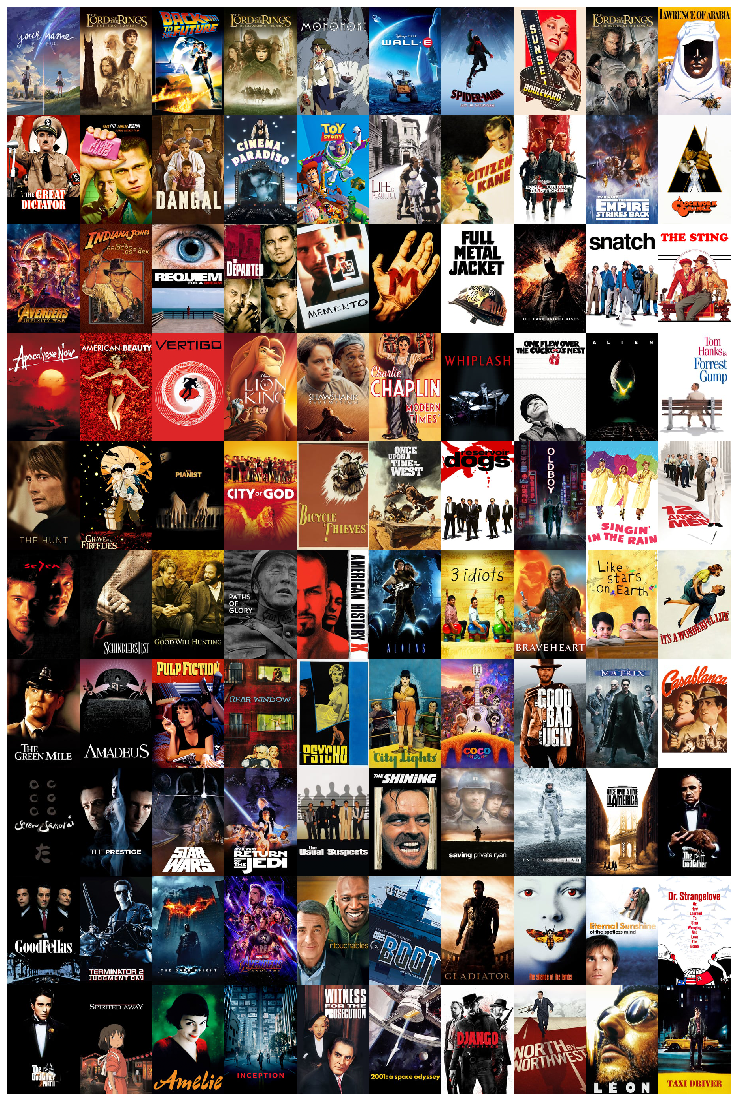

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

fig = plt.figure(figsize=(30, 20))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(h, w), axes_pad=0)

def place_image(i, img):
    img = (scaler.inverse_transform(img)).astype(int)
    grid[i].imshow(img.reshape(original_shape))
    grid[i].axis('off')

to_fill = []
collided = []

for i in range(w*h):
    position = np.unravel_index(i, (h, w))
    if position in win_map:
        img = win_map[position][0]
        collided += win_map[position][1:]
        place_image(i, img)
    else:
        to_fill.append(i)

collided = collided[::-1]
for i in to_fill:
    position = np.unravel_index(i, (h, w))
    img = collided.pop()
    place_image(i, img)

plt.show()